In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from model import *

In [4]:
import pandas as pd 

df = pd.read_csv("prices_all_5m.csv")
n = len(df)

In [5]:
df.head()

,Time,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC,Open_ETH,High_ETH,Low_ETH,Close_ETH,...,Open_MATIC,High_MATIC,Low_MATIC,Close_MATIC,Volume_MATIC,Open_FTM,High_FTM,Low_FTM,Close_FTM,Volume_FTM
0,2021-01-01 11:00:00,28923.63,29017.50,28913.12,28975.65,182.889878,736.42,739.00,735.94,736.89,...,0.01758,0.01763,0.01758,0.01760,229892.3,0.01690,0.01699,0.01690,0.01693,77209.0
1,2021-01-01 11:05:00,28975.65,28979.53,28846.28,28858.94,214.568104,737.06,737.11,732.42,732.80,...,0.01761,0.01761,0.01749,0.01749,148067.8,0.01691,0.01693,0.01679,0.01680,264352.8
2,2021-01-01 11:10:00,28858.94,28883.20,28690.17,28752.80,442.619587,732.87,734.08,730.03,731.14,...,0.01752,0.01752,0.01737,0.01737,322267.6,0.01677,0.01677,0.01661,0.01666,1821517.9
3,2021-01-01 11:15:00,28752.80,28852.48,28720.91,28820.72,174.839779,731.14,732.22,730.46,731.50,...,0.01739,0.01745,0.01739,0.01745,188277.7,0.01666,0.01676,0.01666,0.01673,137113.6
4,2021-01-01 11:20:00,28822.17,28846.46,28744.09,28846.46,161.316784,731.57,731.89,729.33,731.70,...,0.01747,0.01747,0.01743,0.01743,73032.1,0.01676,0.01677,0.01673,0.01673,46090.0


In [25]:
from scipy.stats import sem

volLags = 12 * 24 * 7
coins = ['BTC' , 'ETH', 'AVAX', 'MATIC',  'FTM']

nIter = n - volLags 

data = []
# how frequently we log data 
countLog = 12 * 72 

for coin in coins : 
    seList = []

    for i in range(nIter) : 
        if i % countLog == 0 : 
            se = sem(df["Close_" + coin ][i : i + volLags] ) / df["Close_" + coin ][i : i + volLags].mean()
            seList.append(se)
    
    data.append(seList)

BTC - mean SE : 
0.0008456880811217825
ETH - mean SE : 
0.0010668648047094597
AVAX - mean SE : 
0.0017660885522002912
MATIC - mean SE : 
0.001744425835041426
FTM - mean SE : 
0.00218689962723037


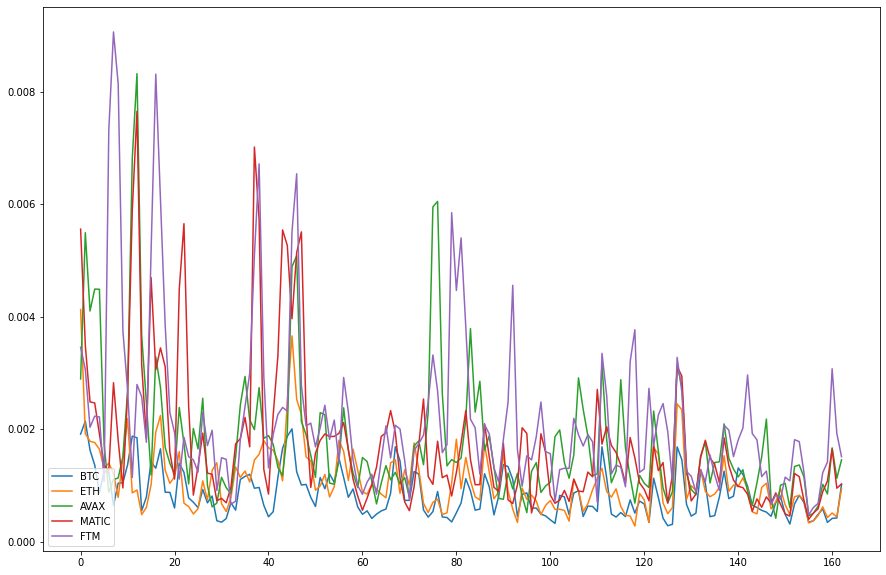

In [26]:
#plt.subplot()
fig = plt.figure()
fig.set_size_inches(15,10)

#fig.subplots_adjust(hspace=1, wspace=1)

ax = fig.add_subplot(1, 1, 1)

for i in range(len(coins)) :
    ax.plot(data[i], label = coins[i])

    print(coins[i] + " - mean SE : ")
    print(sum(data[i]) / len(data[i]))
    
    
ax.legend(loc = 'lower left')

    
plt.show()


AVAX - mean SE : 
1.8677897219924742
MATIC - mean SE : 
1.7741671722383774
FTM - mean SE : 
2.3642200968974443


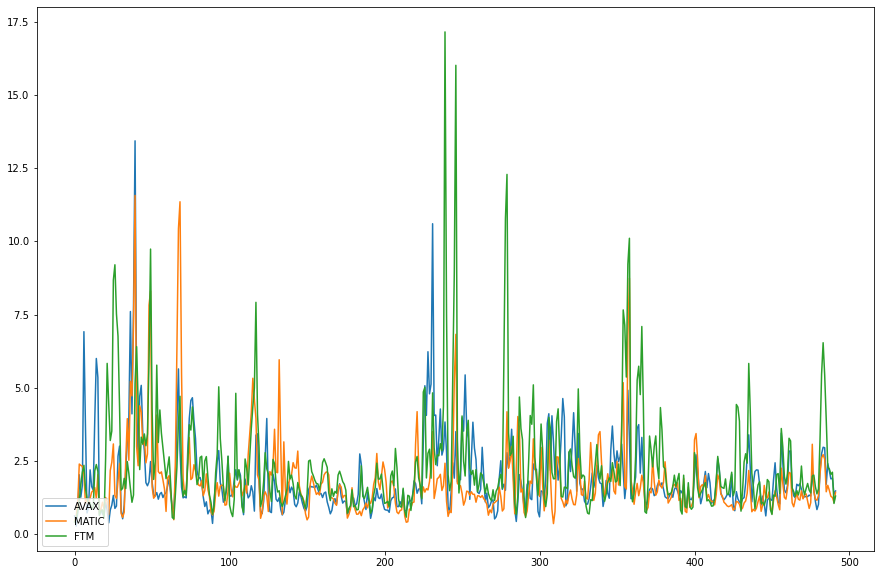

In [22]:
# get vol relative to base coin 
fig = plt.figure()
fig.set_size_inches(15,10)

ax = fig.add_subplot(1, 1, 1)


base = data[1]
comps = ['FTM', 'AVAX', 'MATIC']

for i in range(len(coins)) :
    coin = coins[i]
    
    if coin in comps : 
        res = [i / j for i, j in zip(data[i],  base)]                           
        ax.plot(res, label = coins[i])
        print(coins[i] + " - mean SE : ")
        print(sum(res) / len(res))

ax.legend(loc = 'lower left')

    
plt.show()

In [ ]:
20000 / (24 * 5)